In [32]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [33]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=417a548e12a4700d864e5f19cc73799d


In [34]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [35]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [36]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [37]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

586

In [38]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [39]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | luwuk
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | geraldton
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | saquena
Processing Record 14 of Set 1 | tilichiki
Processing Record 15 of Set 1 | avera
Processing Record 16 of Set 1 | nador
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | dakar
Processing Record 19 of Set 1 | umm durman
City not found. Skipping...
Processing Record 20 of Set 1 | paamiut
Processing Record 21 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 22 of Set 1 | pangkalanbuun
Processing Record 23 of Set 1 | ngaoundere


Processing Record 39 of Set 4 | ajdabiya
Processing Record 40 of Set 4 | honiara
Processing Record 41 of Set 4 | port elizabeth
Processing Record 42 of Set 4 | fort nelson
Processing Record 43 of Set 4 | mitu
Processing Record 44 of Set 4 | henties bay
Processing Record 45 of Set 4 | hasaki
Processing Record 46 of Set 4 | norman wells
Processing Record 47 of Set 4 | mount gambier
Processing Record 48 of Set 4 | pleshanovo
Processing Record 49 of Set 4 | ligayan
Processing Record 50 of Set 4 | millinocket
Processing Record 1 of Set 5 | manono
Processing Record 2 of Set 5 | lagoa
Processing Record 3 of Set 5 | felanitx
Processing Record 4 of Set 5 | lira
Processing Record 5 of Set 5 | constitucion
Processing Record 6 of Set 5 | wattegama
Processing Record 7 of Set 5 | astolfo dutra
Processing Record 8 of Set 5 | anadyr
Processing Record 9 of Set 5 | longyearbyen
Processing Record 10 of Set 5 | trincomalee
Processing Record 11 of Set 5 | marsa matruh
Processing Record 12 of Set 5 | lebu
P

Processing Record 29 of Set 8 | nemuro
Processing Record 30 of Set 8 | severo-kurilsk
Processing Record 31 of Set 8 | sumbawa
City not found. Skipping...
Processing Record 32 of Set 8 | shenjiamen
Processing Record 33 of Set 8 | egvekinot
Processing Record 34 of Set 8 | namibe
Processing Record 35 of Set 8 | itoman
Processing Record 36 of Set 8 | santa isabel do rio negro
Processing Record 37 of Set 8 | road town
Processing Record 38 of Set 8 | kruisfontein
Processing Record 39 of Set 8 | shizunai
Processing Record 40 of Set 8 | katangli
Processing Record 41 of Set 8 | albacete
Processing Record 42 of Set 8 | bhopal
Processing Record 43 of Set 8 | port-gentil
Processing Record 44 of Set 8 | tabukiniberu
City not found. Skipping...
Processing Record 45 of Set 8 | rongcheng
Processing Record 46 of Set 8 | kainantu
Processing Record 47 of Set 8 | gornopravdinsk
Processing Record 48 of Set 8 | newport
Processing Record 49 of Set 8 | kuching
Processing Record 50 of Set 8 | bulawayo
Processi

Processing Record 15 of Set 12 | canora
Processing Record 16 of Set 12 | kulhudhuffushi
Processing Record 17 of Set 12 | rungata
City not found. Skipping...
Processing Record 18 of Set 12 | chimoio
Processing Record 19 of Set 12 | clarence town
Processing Record 20 of Set 12 | honningsvag
Processing Record 21 of Set 12 | irece
Processing Record 22 of Set 12 | sibu
Processing Record 23 of Set 12 | shache
Processing Record 24 of Set 12 | sur
Processing Record 25 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 26 of Set 12 | marsh harbour
Processing Record 27 of Set 12 | sisimiut
Processing Record 28 of Set 12 | sargur
Processing Record 29 of Set 12 | burica
City not found. Skipping...
Processing Record 30 of Set 12 | moose factory
Processing Record 31 of Set 12 | paoua
Processing Record 32 of Set 12 | husavik
Processing Record 33 of Set 12 | tipacoque
Processing Record 34 of Set 12 | laureles
Processing Record 35 of Set 12 | charyshskoye
Processing Record 36 of Set 12 |

In [40]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.10,-79.24,75.99,53,20,8.05,US,2020-08-17 17:32:19
1,Luwuk,-0.95,122.79,74.70,67,100,6.40,ID,2020-08-17 17:42:13
2,Tuktoyaktuk,69.45,-133.04,50.00,87,90,8.05,CA,2020-08-17 17:32:20
3,Geraldton,-28.77,114.60,50.00,93,52,5.82,AU,2020-08-17 17:30:44
4,Arraial Do Cabo,-22.97,-42.03,80.60,69,75,5.82,BR,2020-08-17 17:28:24
5,Georgetown,5.41,100.34,82.00,83,20,2.59,MY,2020-08-17 17:29:00
6,Atuona,-9.80,-139.03,78.30,76,0,17.52,PF,2020-08-17 17:32:23
7,Rikitea,-23.12,-134.97,71.06,78,7,11.70,PF,2020-08-17 17:32:26
8,Butaritari,3.07,172.79,81.05,62,70,6.26,KI,2020-08-17 17:32:22
9,Hilo,19.73,-155.09,75.20,83,90,10.29,US,2020-08-17 17:32:58


In [41]:
new_column_order =['City', "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [42]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [43]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [44]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1597686265.6812153

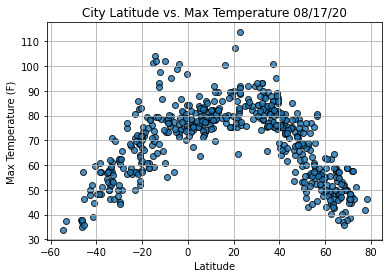

In [45]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Maxtemps.png")

# Show plot.
plt.show()

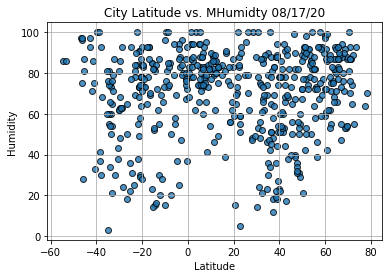

In [46]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. MHumidty "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Humidity.png")

# Show plot.
plt.show()

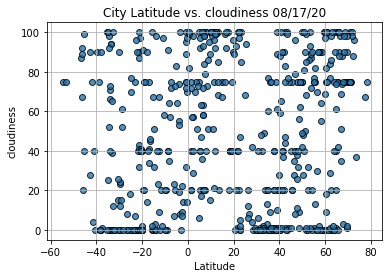

In [47]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. cloudiness "+ time.strftime("%x"))
plt.ylabel("cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Cloudiness.png")

# Show plot.
plt.show()

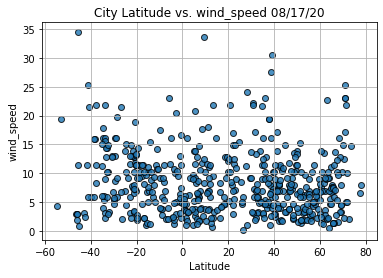

In [48]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. wind_speed "+ time.strftime("%x"))
plt.ylabel("wind_speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/wind_speed.png")

# Show plot.
plt.show()

In [131]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [132]:
index13 = city_data_df.loc[13]
index13

City                    Tilichiki
Country                        RU
Date          2020-08-17 17:42:15
Lat                         60.47
Lng                         166.1
Max Temp                     43.2
Humidity                       92
Cloudiness                      9
Wind Speed                   7.56
Name: 13, dtype: object

In [133]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2020-08-17 17:32:19,42.10,-79.24,75.99,53,20,8.05
1,Luwuk,ID,2020-08-17 17:42:13,-0.95,122.79,74.70,67,100,6.40
2,Tuktoyaktuk,CA,2020-08-17 17:32:20,69.45,-133.04,50.00,87,90,8.05
3,Geraldton,AU,2020-08-17 17:30:44,-28.77,114.60,50.00,93,52,5.82
4,Arraial Do Cabo,BR,2020-08-17 17:28:24,-22.97,-42.03,80.60,69,75,5.82


In [134]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [135]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [147]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

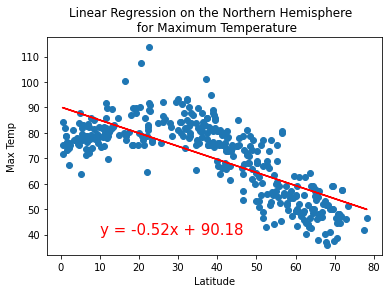

In [148]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere  \n for Maximum Temperature', 'Max Temp',(10,40))

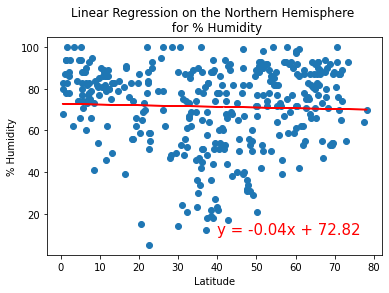

In [149]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

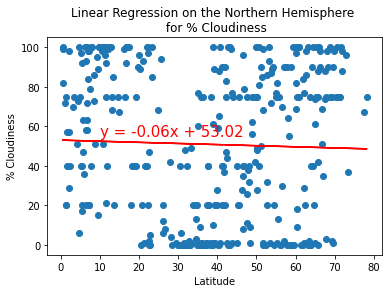

In [162]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

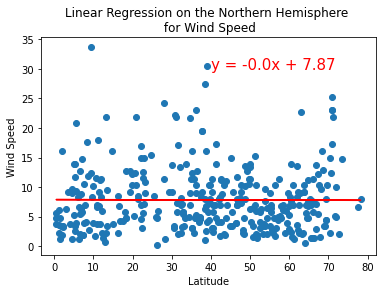

In [174]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,30))

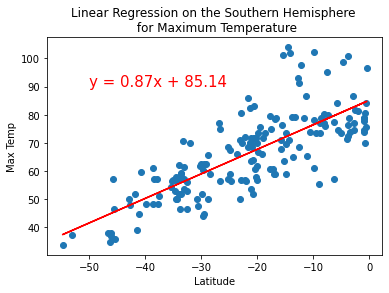

In [171]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

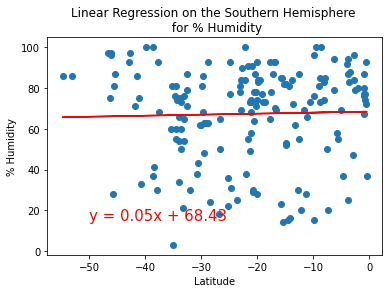

In [154]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

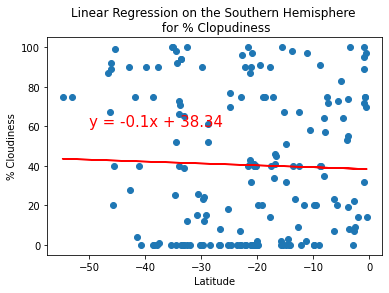

In [169]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Clopudiness', '% Cloudiness',(-50,60))

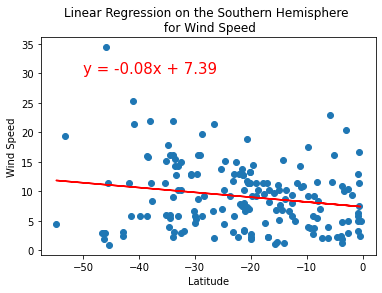

In [178]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,30))